In [35]:
#Step 1: Importing Libraries
# Import TensorFlow and Keras for building CNNs
import tensorflow as tf
from tensorflow.keras import layers, models

# Import libraries for data manipulation and visualization
import numpy as np
import matplotlib.pyplot as plt

# Suppress TensorFlow warnings (optional)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Check TensorFlow version (optional, to ensure compatibility)
print("TensorFlow Version:", tf.__version__)


TensorFlow Version: 2.17.1


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
First 5 training labels: [6 9 9 4 1]


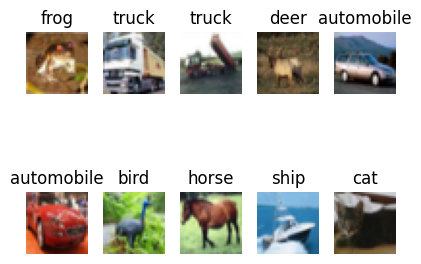

In [37]:
#Step 2: Load and Explore the Dataset
# Load the CIFAR-10 dataset from Keras datasets
from tensorflow.keras.datasets import cifar10

# Split into training and test datasets
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Print dataset shapes
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Display the first 5 labels
print("First 5 training labels:", train_labels[:5].flatten())

# Display a few sample images with their labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(4, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [38]:
#Step 3: Preprocess the Data
# Normalize pixel values to range 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Print shapes after preprocessing
print("Normalized training images shape:", train_images.shape)
print("One-hot encoded training labels shape:", train_labels.shape)


Normalized training images shape: (50000, 32, 32, 3)
One-hot encoded training labels shape: (50000, 10)


In [39]:
#Step 4: Build the CNN Model
from tensorflow.keras import layers, models

# Initialize a Sequential model
model = models.Sequential()

# Add convolutional layers followed by pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output from the convolutional layers
model.add(layers.Flatten())

# Add dense (fully connected) layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
#Step 5: Compile the Model
# Compile the model
model.compile(
    optimizer='adam',  # Optimizer for updating weights
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Metric to evaluate during training and testing
)

# Display a confirmation message
print("Model compiled successfully!")


Model compiled successfully!


In [7]:
#Step 6: Train the Model
# Train the model
history = model.fit(
    train_images,            # Training images
    train_labels,            # Training labels (one-hot encoded)
    epochs=10,               # Number of training epochs
    validation_data=(test_images, test_labels),  # Validation data
    batch_size=64,           # Batch size for gradient updates
    verbose=1                # Verbosity level for training output
)

# Display a confirmation message
print("Model training complete!")


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 88ms/step - accuracy: 0.3221 - loss: 1.8393 - val_accuracy: 0.5170 - val_loss: 1.3351
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.5329 - loss: 1.2978 - val_accuracy: 0.5574 - val_loss: 1.2282
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - accuracy: 0.6018 - loss: 1.1282 - val_accuracy: 0.6259 - val_loss: 1.0534
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.6431 - loss: 1.0142 - val_accuracy: 0.6557 - val_loss: 0.9944
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 89ms/step - accuracy: 0.6760 - loss: 0.9269 - val_accuracy: 0.6824 - val_loss: 0.9209
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.7000 - loss: 0.8597 - val_accuracy: 0.6779 - val_loss: 0.9372
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 86ms/step - accuracy: 0.7117 - loss: 0.8235 - val_accuracy: 0.6893 - val_loss: 0.8903
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.7325 - loss: 0.7672 - 

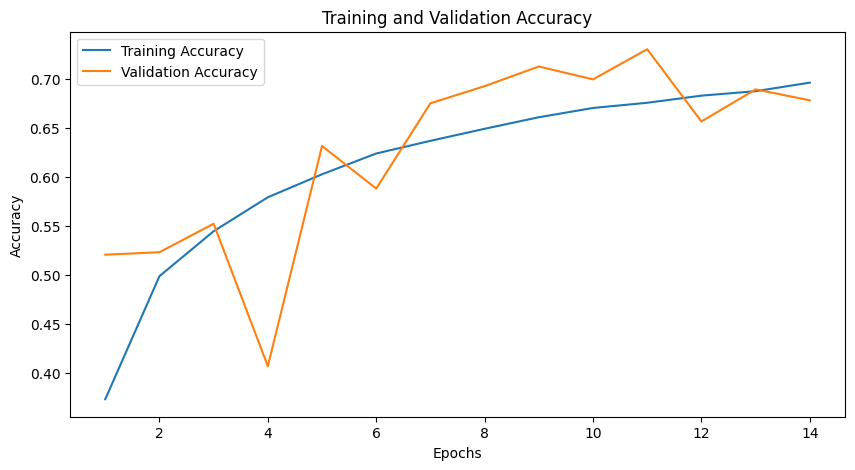

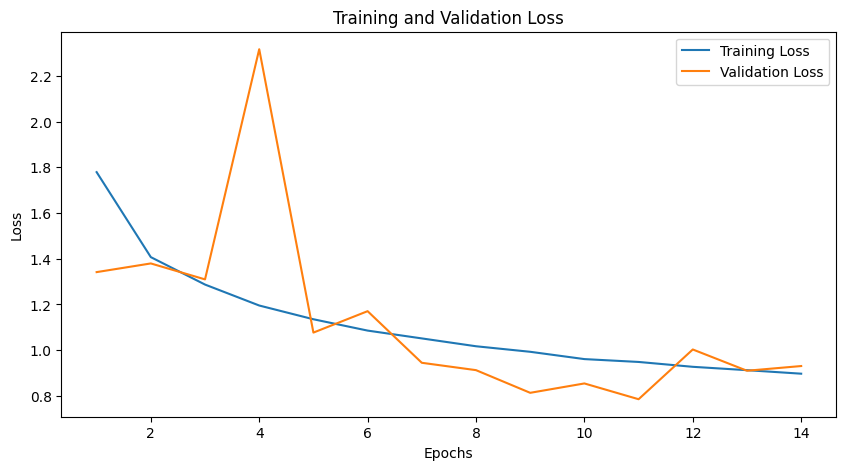

In [42]:
#Step 7: Visualizing Training Results
import matplotlib.pyplot as plt

# Extract accuracy and loss from the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [9]:
#Step 8: Evaluate Model Performance
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=1)

# Print the test results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7063 - loss: 0.8489
Test Loss: 0.8669
Test Accuracy: 0.7004


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step
Classification Report:

              precision    recall  f1-score   support

    airplane       0.77      0.71      0.74      1000
  automobile       0.79      0.84      0.82      1000
        bird       0.64      0.50      0.56      1000
         cat       0.54      0.49      0.51      1000
        deer       0.66      0.70      0.68      1000
         dog       0.52      0.71      0.60      1000
        frog       0.74      0.81      0.77      1000
       horse       0.81      0.69      0.75      1000
        ship       0.88      0.71      0.79      1000
       truck       0.74      0.84      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



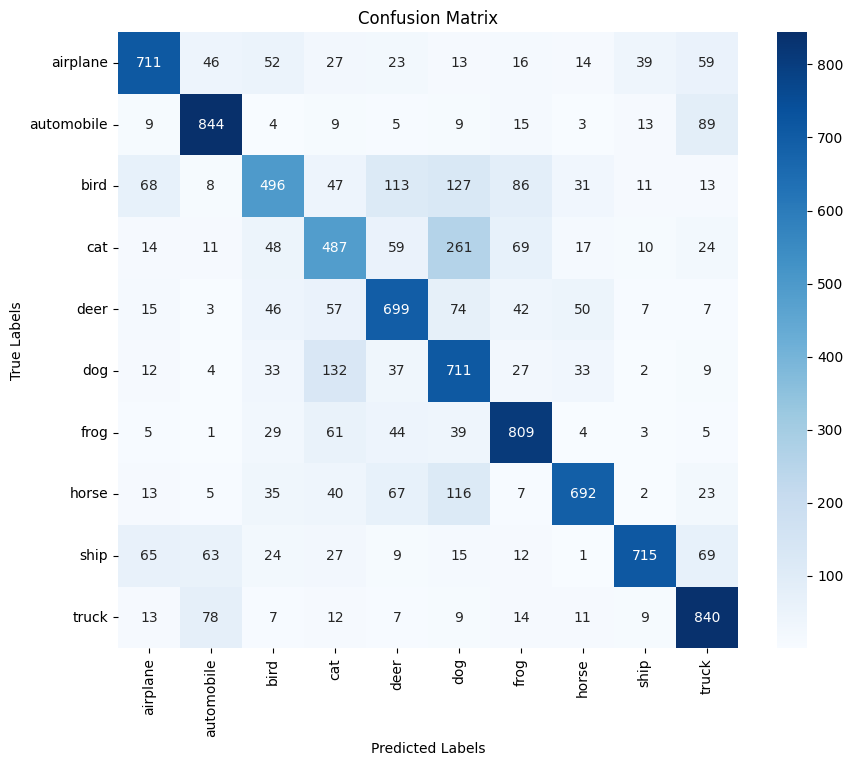

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict the labels for the test dataset
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Generate the classification report
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print("Classification Report:\n")
print(classification_report(true_labels, predicted_labels, target_names=class_names))

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


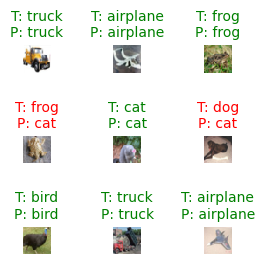

In [22]:
#Step 9: Visualizing Model Predictions#
import matplotlib.pyplot as plt
import numpy as np

# Predict the labels for the test dataset
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class indices
true_labels = np.argmax(test_labels, axis=1)  # Convert one-hot encoded labels to class indices

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Select random test samples to visualize
num_samples = 9
indices = np.random.choice(len(test_images), num_samples, replace=False)
selected_images = test_images[indices]
selected_true_labels = true_labels[indices]
selected_predicted_labels = predicted_labels[indices]

# Plot the selected test images with predictions
plt.figure(figsize=(3, 3))  # Adjust figure size
for i in range(num_samples):
    plt.subplot(3, 3, i + 1)
    plt.imshow(selected_images[i], interpolation='nearest')  # No interpolation for pixel clarity

    # Shorter titles with correct/incorrect coloring
    color = 'green' if selected_true_labels[i] == selected_predicted_labels[i] else 'red'
    plt.title(f"T: {class_names[selected_true_labels[i]]}\nP: {class_names[selected_predicted_labels[i]]}",
              fontsize=10, color=color)

    plt.axis('off')  # Turn off axes for better visibility

plt.tight_layout(pad=2.0)  # Add spacing between plots
plt.show()


In [25]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the CNN Model with Batch Normalization and Dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(10, activation='softmax')  # Output layer
])

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Set Up Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)

# Train the Model with Data Augmentation and Early Stopping
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=20,  # Early stopping will halt if no improvement
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping]
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 135s 167ms/step - accuracy: 0.3030 - loss: 2.0641 - val_accuracy: 0.5207 - val_loss: 1.3415
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 165ms/step - accuracy: 0.4866 - loss: 1.4454 - val_accuracy: 0.5232 - val_loss: 1.3794
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 165ms/step - accuracy: 0.5368 - loss: 1.3079 - val_accuracy: 0.5522 - val_loss: 1.3097
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 161ms/step - accuracy: 0.5737 - loss: 1.2115 - val_accuracy: 0.4072 - val_loss: 2.3163
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 125s 160ms/step - accuracy: 0.5990 - loss: 1.1461 - val_accuracy: 0.6313 - val_loss: 1.0770
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 161ms/step - accuracy: 0.6239 - loss: 1.0863 - val_accuracy: 0.5880 - val_loss: 1.1707
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 127s 162ms/step - accuracy: 0.6348 - loss: 1.0570 - val_accuracy: 0.6748 - val_loss: 0.9449
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 126s 160ms/step - accuracy: 0.6463 - loss: 1.02

In [26]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.7300 - loss: 0.7856
Test Loss: 0.7856
Test Accuracy: 0.7298


In [27]:
# Flatten the training and test images
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

print("Flattened training data shape:", train_images_flat.shape)
print("Flattened test data shape:", test_images_flat.shape)


Flattened training data shape: (50000, 3072)
Flattened test data shape: (10000, 3072)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression
logistic_model = LogisticRegression(max_iter=100, solver='saga', multi_class='multinomial')
logistic_model.fit(train_images_flat, np.argmax(train_labels, axis=1))

# Predict and evaluate
logistic_predictions = logistic_model.predict(test_images_flat)
logistic_accuracy = accuracy_score(np.argmax(test_labels, axis=1), logistic_predictions)

print(f"Logistic Regression Test Accuracy: {logistic_accuracy:.4f}")
print("Logistic Regression Classification Report:")
print(classification_report(np.argmax(test_labels, axis=1), logistic_predictions, target_names=class_names))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Test Accuracy: 0.4036
Logistic Regression Classification Report:
              precision    recall  f1-score   support

    airplane       0.46      0.49      0.47      1000
  automobile       0.47      0.47      0.47      1000
        bird       0.33      0.29      0.31      1000
         cat       0.28      0.26      0.27      1000
        deer       0.35      0.29      0.32      1000
         dog       0.33      0.33      0.33      1000
        frog       0.40      0.46      0.43      1000
       horse       0.45      0.44      0.44      1000
        ship       0.50      0.53      0.51      1000
       truck       0.43      0.46      0.45      1000

    accuracy                           0.40     10000
   macro avg       0.40      0.40      0.40     10000
weighted avg       0.40      0.40      0.40     10000



In [29]:
from sklearn.neighbors import KNeighborsClassifier

# Train k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_images_flat, np.argmax(train_labels, axis=1))

# Predict and evaluate
knn_predictions = knn_model.predict(test_images_flat)
knn_accuracy = accuracy_score(np.argmax(test_labels, axis=1), knn_predictions)

print(f"k-NN Test Accuracy: {knn_accuracy:.4f}")
print("k-NN Classification Report:")
print(classification_report(np.argmax(test_labels, axis=1), knn_predictions, target_names=class_names))


k-NN Test Accuracy: 0.3398
k-NN Classification Report:
              precision    recall  f1-score   support

    airplane       0.38      0.54      0.45      1000
  automobile       0.65      0.20      0.31      1000
        bird       0.23      0.45      0.30      1000
         cat       0.29      0.22      0.25      1000
        deer       0.24      0.51      0.33      1000
         dog       0.39      0.22      0.28      1000
        frog       0.35      0.25      0.29      1000
       horse       0.68      0.21      0.32      1000
        ship       0.40      0.66      0.50      1000
       truck       0.70      0.14      0.23      1000

    accuracy                           0.34     10000
   macro avg       0.43      0.34      0.33     10000
weighted avg       0.43      0.34      0.33     10000

